Introduction:

Education:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns

#load data
edu_df = pd.read_csv('educational-attainment-for-the-population-25-years-and-over.csv')
#grab columns of interest
ed_cols = ['Neighborhood', 'Estimate; Total:', 'Estimate; Total: - Regular high school diploma', 'Estimate; Total: - GED or alternative credential', 'Estimate; Total: - Some college, less than 1 year', 'Estimate; Total: - Some college, 1 or more years, no degree', 'Estimate; Total: - Associate\'s degree','Estimate; Total: - Bachelor\'s degree','Estimate; Total: - Master\'s degree','Estimate; Total: - Professional school degree','Estimate; Total: - Doctorate degree']

#new dataframe
ed_data = edu_df[ed_cols].copy()
#rename
ed_data.columns = ['Neighborhood', 'Total', 'Diploma', 'GED', 'Less than one year', 'More than one year', 'Associate\'s', 'Bachelor\'s', 'Master\'s', 'Professional', 'Doctorate']


#get sum of college degrees
ed_data['College Degree'] = (ed_data['Associate\'s'] + ed_data['Bachelor\'s'] + ed_data['Master\'s'] + ed_data['Professional'] + ed_data['Doctorate'])
#get percentage
ed_data['College Percentage'] = (ed_data['College Degree'] / ed_data['Total']) * 100
#sorting
degree_ranked = ed_data.sort_values(by='College Percentage', ascending=False)

#get sum of grad degrees
ed_data['Graduate Degree'] = (ed_data['Master\'s'] + ed_data['Professional'] + ed_data['Doctorate'])
#get percetage
ed_data['Graduate Percentage'] = (ed_data['Graduate Degree'] / ed_data['Total']) * 100
#sorting
grad_ranked = ed_data.sort_values(by='Graduate Percentage', ascending=False)

#get sum of at least diploma
ed_data['Diploma\'s'] = (ed_data['Diploma'] + ed_data['GED'] + ed_data['Less than one year'] + ed_data['More than one year'] + ed_data['Associate\'s'] + ed_data['Bachelor\'s'] + ed_data['Master\'s'] + ed_data['Professional'] + ed_data['Doctorate'])
#get percentage
ed_data['Diploma Percentage'] = (ed_data['Diploma\'s'] / ed_data['Total']) * 100
#sorting
diploma_ranked = ed_data.sort_values(by='Diploma Percentage', ascending=False)

Top 10 neighborhoods by percentage of population with at least any college degree:
           Neighborhood    Total  College Degree  College Percentage
71          South Shore      8.0             8.0          100.000000
80       Strip District    611.0           549.0           89.852700
68            Shadyside   9414.0          7883.0           83.736987
76  Squirrel Hill North   5494.0          4589.0           83.527485
66        Regent Square    774.0           622.0           80.361757
63         Point Breeze   4022.0          3189.0           79.288911
57          North Shore    159.0           125.0           78.616352
64   Point Breeze North   1527.0          1184.0           77.537656
77  Squirrel Hill South  11164.0          8489.0           76.039054
56        North Oakland   2937.0          2160.0           73.544433


<Axes: >

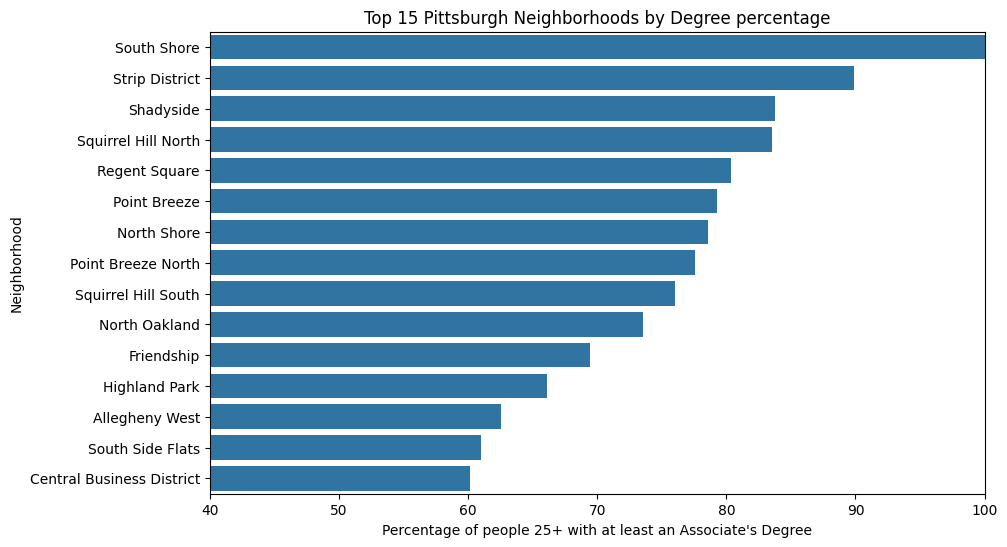

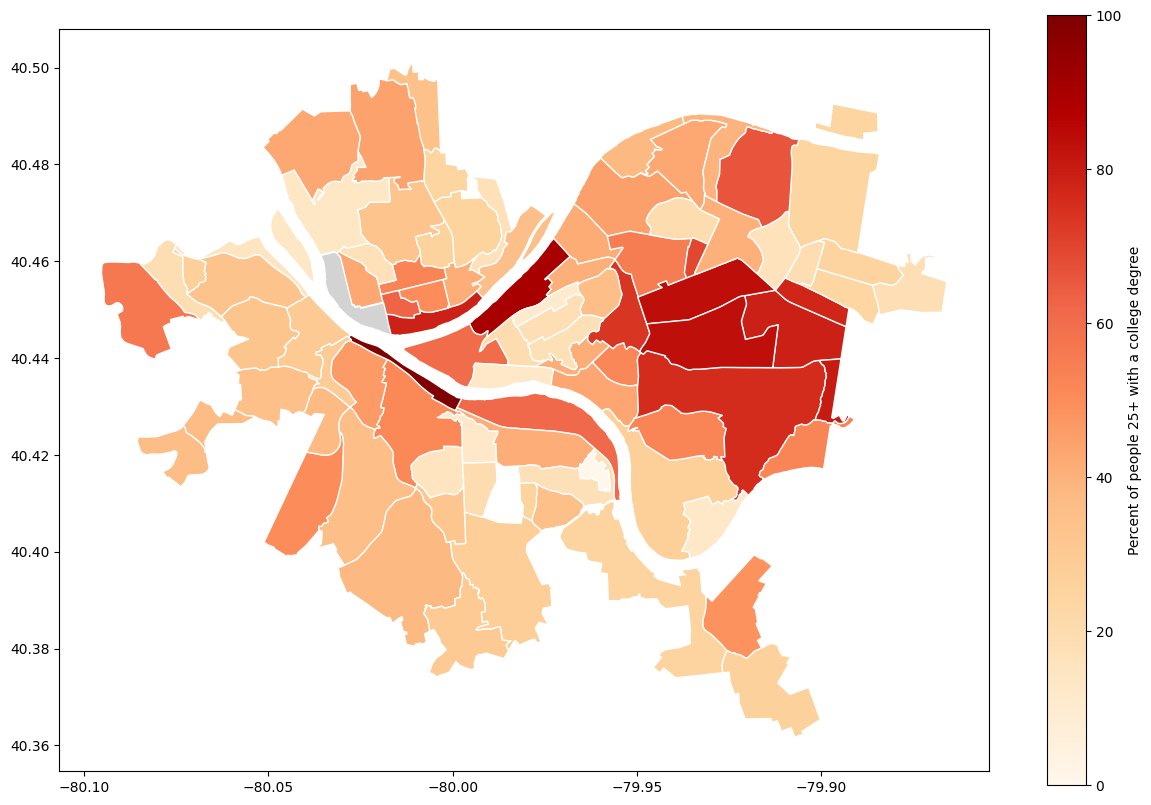

In [6]:
#output for college degrees
print("Top 10 neighborhoods by percentage of population with at least any college degree:")
print(degree_ranked[['Neighborhood', 'Total', 'College Degree', 'College Percentage']].head(10))
#percentage of ppl over 25 with a college degree
plt.figure(figsize=(10, 6))
top_15 = degree_ranked.head(15)
sns.barplot(x='College Percentage', y='Neighborhood', data=top_15)
plt.title('Top 15 Pittsburgh Neighborhoods by Degree percentage')
plt.xlabel('Percentage of people 25+ with at least an Associate\'s Degree')
plt.xlim(40, 100)
#geoplot
neighborhoods = geopandas.read_file("neighborhoods/Neighborhoods_.shp")
degree_map = neighborhoods.merge(degree_ranked[['Neighborhood', 'College Percentage']], how='left', left_on='hood', right_on='Neighborhood')
degree_map.plot(column='College Percentage', cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Percent of people 25+ with a college degree"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})

Top 10 neighborhoods by percentage of population with graduate degrees:
           Neighborhood    Total  Graduate Degree  Graduate Percentage
76  Squirrel Hill North   5494.0           3125.0            56.880233
71          South Shore      8.0              4.0            50.000000
63         Point Breeze   4022.0           1904.0            47.339632
66        Regent Square    774.0            366.0            47.286822
68            Shadyside   9414.0           4411.0            46.855747
77  Squirrel Hill South  11164.0           4994.0            44.733071
56        North Oakland   2937.0           1286.0            43.786176
80       Strip District    611.0            239.0            39.116203
57          North Shore    159.0             60.0            37.735849
33           Friendship   1447.0            538.0            37.180373


<Axes: >

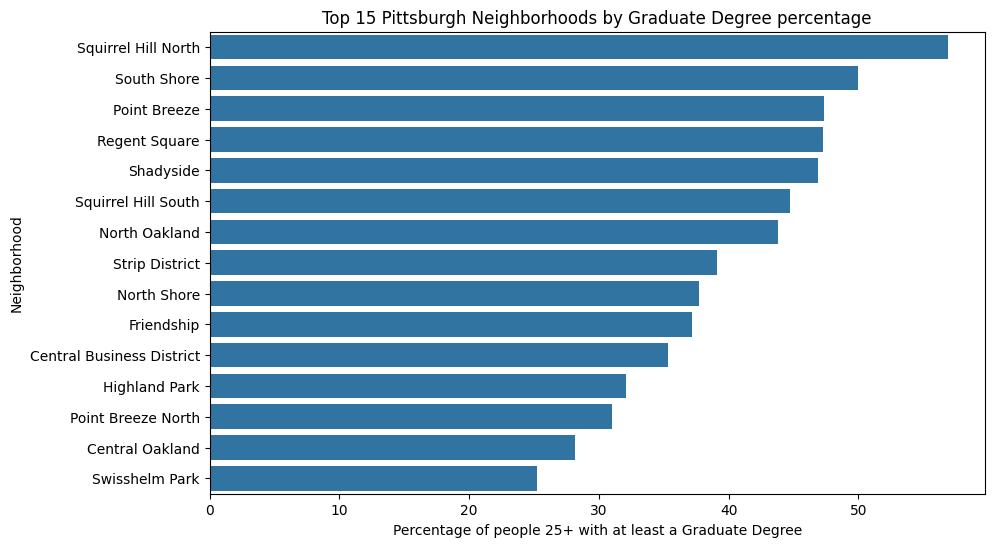

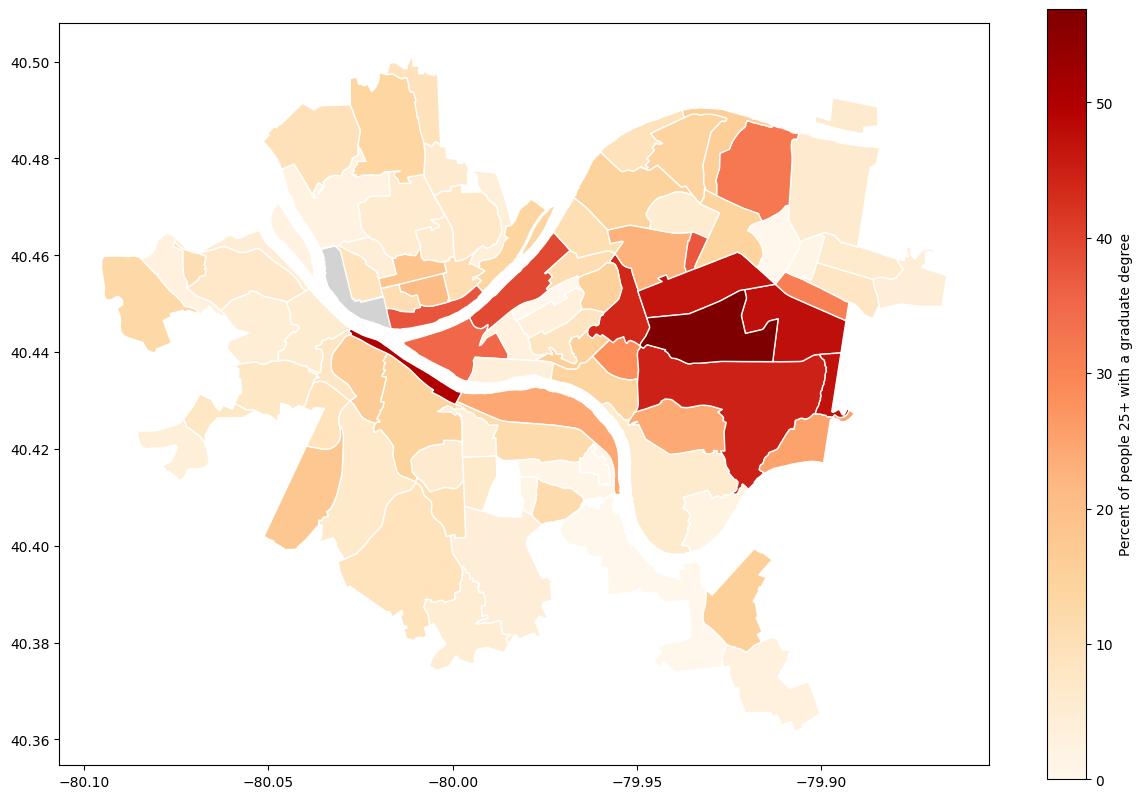

In [7]:
#output for graduate degrees
print("Top 10 neighborhoods by percentage of population with graduate degrees:")
print(grad_ranked[['Neighborhood', 'Total', 'Graduate Degree', 'Graduate Percentage']].head(10))
#percent of ppl with graduate degrees
plt.figure(figsize=(10, 6))
top_15 = grad_ranked.head(15)
sns.barplot(x='Graduate Percentage', y='Neighborhood', data=top_15)
plt.title('Top 15 Pittsburgh Neighborhoods by Graduate Degree percentage')
plt.xlabel('Percentage of people 25+ with at least a Graduate Degree')
#geoplot
neighborhoods = geopandas.read_file("neighborhoods/Neighborhoods_.shp")
graduate_map = neighborhoods.merge(grad_ranked[['Neighborhood', 'Graduate Percentage']], how='left', left_on='hood', right_on='Neighborhood')
graduate_map.plot(column='Graduate Percentage', cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Percent of people 25+ with a graduate degree"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})

Top 10 neighborhoods by percentage of population with at least a high school diploma:
           Neighborhood    Total  Diploma's  Diploma Percentage
57          North Shore    159.0      159.0          100.000000
80       Strip District    611.0      611.0          100.000000
71          South Shore      8.0        8.0          100.000000
87             West End    112.0      112.0          100.000000
64   Point Breeze North   1527.0     1514.0           99.148657
39        Highland Park   4674.0     4579.0           97.967480
63         Point Breeze   4022.0     3939.0           97.936350
76  Squirrel Hill North   5494.0     5373.0           97.797597
77  Squirrel Hill South  11164.0    10867.0           97.339663
68            Shadyside   9414.0     9150.0           97.195666


<Axes: >

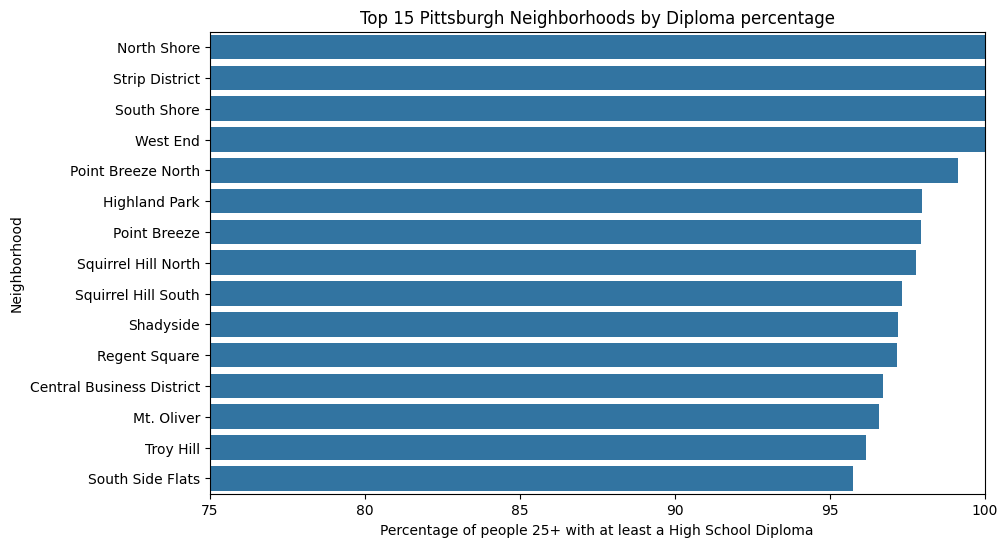

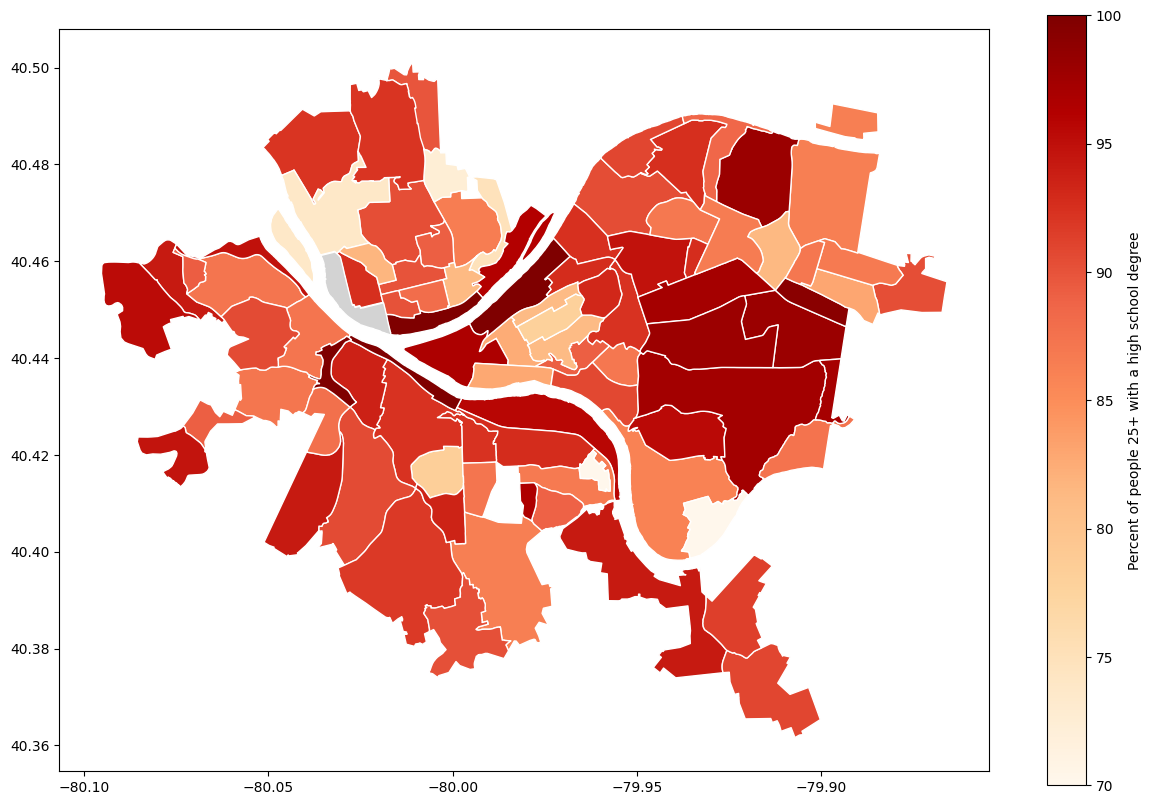

In [8]:
#output for high school degrees
print("Top 10 neighborhoods by percentage of population with at least a high school diploma:")
print(diploma_ranked[['Neighborhood', 'Total', 'Diploma\'s', 'Diploma Percentage']].head(10))
#percent of ppl with at least high school degrees
plt.figure(figsize=(10, 6))
top_15 = diploma_ranked.head(15)
sns.barplot(x='Diploma Percentage', y='Neighborhood', data=top_15)
plt.title('Top 15 Pittsburgh Neighborhoods by Diploma percentage')
plt.xlabel('Percentage of people 25+ with at least a High School Diploma')
plt.xlim(75, 100)
#geoplot
neighborhoods = geopandas.read_file("neighborhoods/Neighborhoods_.shp")
diploma_map = neighborhoods.merge(diploma_ranked[['Neighborhood', 'Diploma Percentage']], how='left', left_on='hood', right_on='Neighborhood')
diploma_map.plot(column='Diploma Percentage', cmap='OrRd', edgecolor="white", legend=True, vmin =70, legend_kwds={'label': "Percent of people 25+ with a high school degree"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})

The top 10 neighborhoods by overall education score:
           Neighborhood  Diploma Percentage  College Percentage  \
71          South Shore          100.000000          100.000000   
76  Squirrel Hill North           97.797597           83.527485   
80       Strip District          100.000000           89.852700   
68            Shadyside           97.195666           83.736987   
66        Regent Square           97.157623           80.361757   
63         Point Breeze           97.936350           79.288911   
77  Squirrel Hill South           97.339663           76.039054   
57          North Shore          100.000000           78.616352   
56        North Oakland           92.271025           73.544433   
64   Point Breeze North           99.148657           77.537656   

    Graduate Percentage  Education Score  
71            50.000000        85.000000  
76            56.880233        78.387332  
80            39.116203        76.661211  
68            46.855747        75.364

Text(0.5, 1.0, 'Overall Educational Level by Pittsburgh Neighborhood')

<Figure size 1500x1000 with 0 Axes>

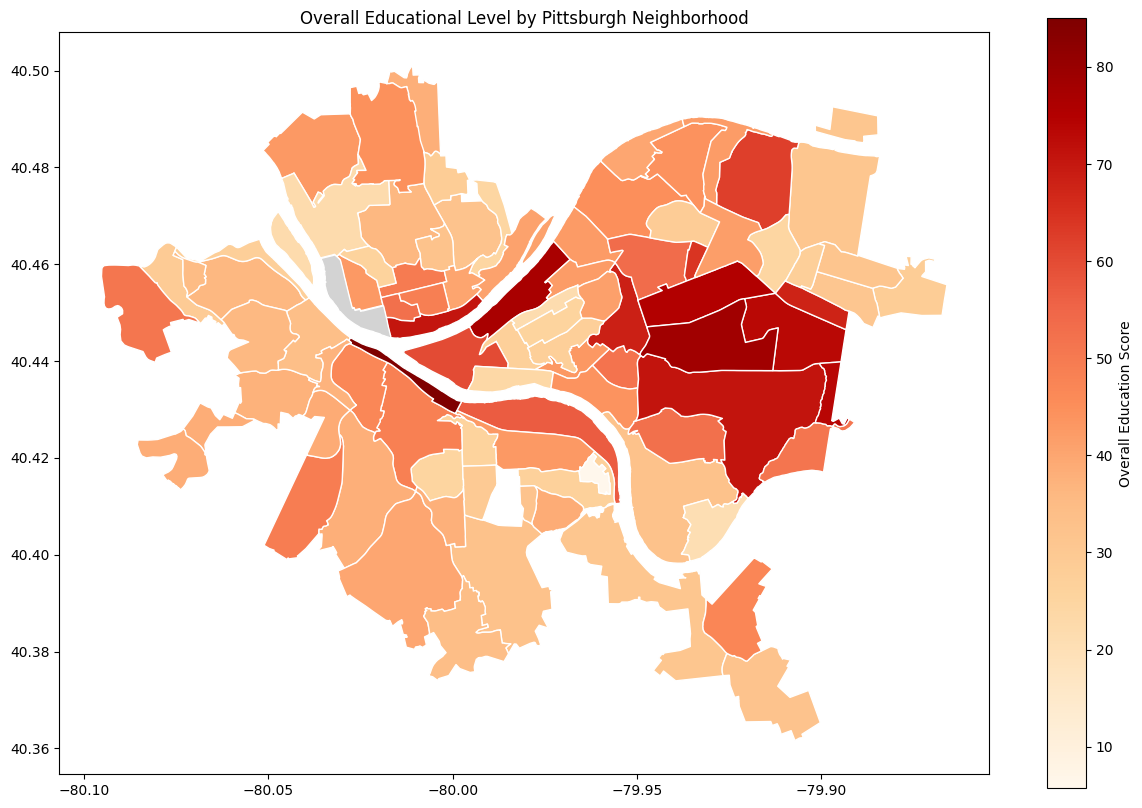

In [9]:
#Best Overall
print("The top 10 neighborhoods by overall education score:")
ed_data['Education Score'] = (ed_data['Diploma Percentage'] * 0.2 + ed_data['College Percentage'] * 0.5 + ed_data['Graduate Percentage'] * 0.3)

best_overall = ed_data.sort_values(by='Education Score', ascending=False)
print(best_overall[['Neighborhood', 'Diploma Percentage', 'College Percentage', 'Graduate Percentage', 'Education Score']].head(10))

plt.figure(figsize=(15, 10))
edu_score_map = neighborhoods.merge(best_overall[['Neighborhood', 'Education Score']], how='left', left_on='hood', right_on='Neighborhood')
edu_score_map.plot(column='Education Score', cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Overall Education Score"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.title('Overall Educational Level by Pittsburgh Neighborhood')

The Best Neighborhood: Based on the data, we were able to determine that Squirrel Hill North is the best neighborhood in Pittsburgh. The technical winner was South Shore, but with a population of only eight people, there isn't enough sample size to definitively call it a neighborhood. Other close neighborhoods were The Strip District, Shadyside, and Regent Square. Squirrel Hill North, however, about 97% of the people over 25 have High School Diplomas, more than 83% with college degrees, and 57% with graduate degrees. Therefore, we place it as the best neighborhood in Pittsburgh based on education.

Crime Rate:

I want to determine the best neighborhood, and we always have to see safety wise how that can be determined. Crime Rate Time!! Where is the lowest crime rate? If you lived in Pittsburgh your whole life, you know where to avoid, especially during nighttime. But, if your new to PA, I got you. Metric is based off non-traffic citations, cause cmon.

Data preview:
   _id       PK       CCR GENDER RACE   AGE            CITEDTIME  \
0    1  1078081  16157849      M    B  29.0  2016-08-22T23:45:00   
1    2  1078082  16157849      M    W  21.0  2016-08-22T23:45:00   
2    3  1078083  16159579    NaN  NaN   NaN  2016-08-25T11:10:00   
3    4  1078084  16159780      M    B  22.0  2016-08-25T16:42:00   
4    5  1078085  16161591      F    W  22.0  2016-08-28T00:58:00   

                           INCIDENTLOCATION  \
0  200 Block N DITHRIDGE ST PITTSBURGH, PA    
1  200 Block N DITHRIDGE ST PITTSBURGH, PA    
2                NORTH PARK PITTSBURGH, PA    
3  7200 Block FRANKSTOWN AV PITTSBURGH, PA    
4      6100 Block BERLIN WY PITTSBURGH, PA    

                                            OFFENSES         NEIGHBORHOOD  \
0  5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...        North Oakland   
1  5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...        North Oakland   
2                            5505 Public Drunkenness     Allegh

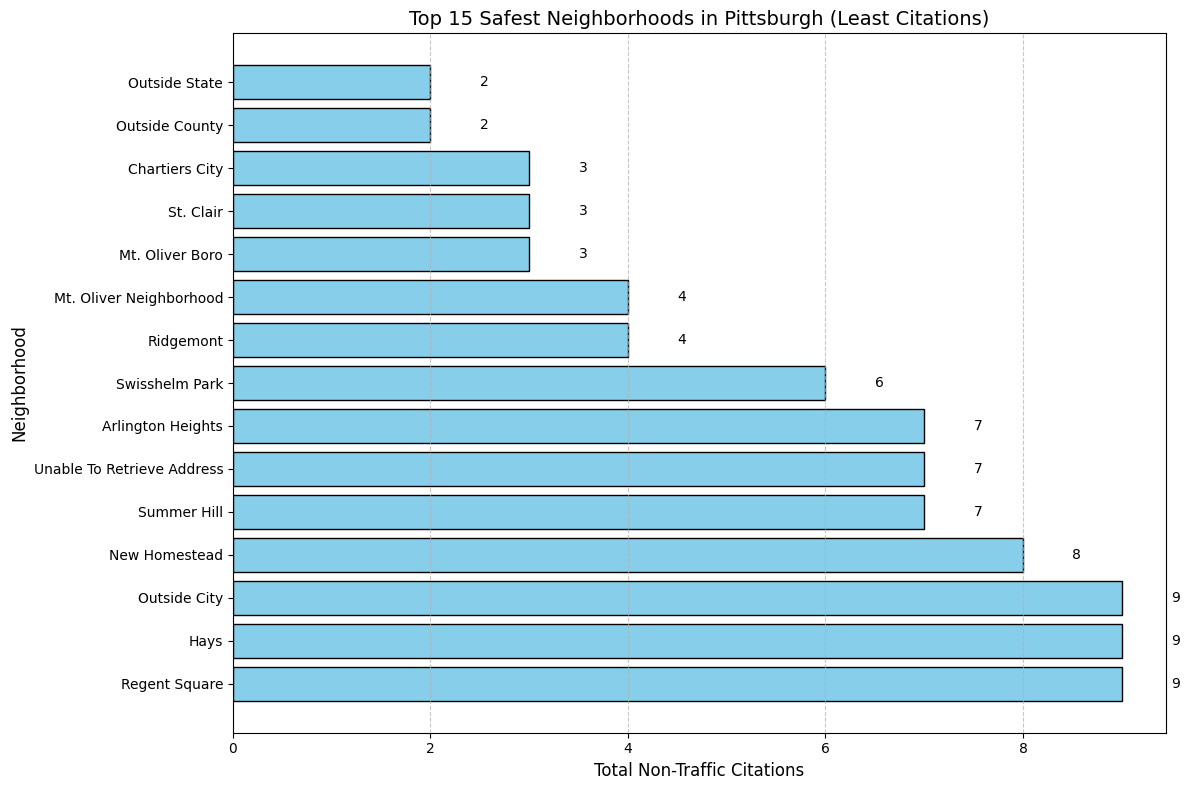

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the legendary CSV file 
try:
    df = pd.read_csv('non-traffic-citations.csv')
except FileNotFoundError:
    print("Error: 'non-traffic-citations.csv' not found. Please check the file path.")
    raise

# Preview the data and list available columns
print("Data preview:")
print(df.head(), "\n")
print("Columns in the dataset:")
print(df.columns.tolist(), "\n")

# Convert CITEDTIME column to datetime
if 'CITEDTIME' in df.columns:
    df['CITEDTIME'] = pd.to_datetime(df['CITEDTIME'], errors='coerce')
    print("Converted 'CITEDTIME' to datetime.")
else:
    print("Error: 'CITEDTIME' column not found, goofy.")

# Check for missing values in NEIGHBORHOOD column
if 'NEIGHBORHOOD' in df.columns:
    missing_neighborhood = df['NEIGHBORHOOD'].isna().sum()
    print(f"Missing values in 'NEIGHBORHOOD': {missing_neighborhood}")
else:
    print("Error: 'NEIGHBORHOOD' column not found in the dataset.")

# Group data by neighborhood and count the number of citations
if 'NEIGHBORHOOD' in df.columns:
    citations_by_nbhd = df.groupby('NEIGHBORHOOD').size().reset_index(name='TotalCitations')
    print("Citation counts by Neighborhood:")
    print(citations_by_nbhd.sort_values(by='TotalCitations'), "\n")
else:
    print("Cannot group data because 'NEIGHBORHOOD' column is missing.")
    citations_by_nbhd = pd.DataFrame()

# Filter for the top 15 safest areas 
if not citations_by_nbhd.empty:
    safest_areas = citations_by_nbhd.sort_values(by='TotalCitations', ascending=True).head(15)
    
    plt.figure(figsize=(12, 8))
    
    # Make that horizontal bar chart one TIME!
    bars = plt.barh(safest_areas['NEIGHBORHOOD'], safest_areas['TotalCitations'],
                    color='skyblue', edgecolor='black')
    
    plt.xlabel('Total Non-Traffic Citations', fontsize=12)
    plt.ylabel('Neighborhood', fontsize=12)
    plt.title('Top 15 Safest Neighborhoods in Pittsburgh (Least Citations)', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Invert y-axis so that the safest appears at the top
    plt.gca().invert_yaxis()
    
    # Annotate each bar with corresponding total citation count
    for bar in bars:
        width = bar.get_width()  # number of citations
        y_pos = bar.get_y() + bar.get_height() / 2  # vertical center of the bar
        plt.text(width + 0.5, y_pos, str(int(width)), va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting.")
 

It looks like the South Side Flats is a literal WARZONE! Stay away from there. I am surprised that my hometown Mckees Rocks is not the worst place to live in. But, you should experience low crime rates in areas like **St. Clair**, **Mt. Oliver**, **Chartiers City**, **Ridgemont** and anywhere outside of the trenches like Downtown Pittsburgh, and Oakland areas.

Smart Trash Containers:

It's an unusual way to check the best neighborhood by checking the amount of smart trash. However, by using such details, it could reflect that where has more population, where has more municipal services.

Missing 'neighborhood': 1

Trash can counts by Neighborhood:
           neighborhood  TrashCount
57            Shadyside          76
25         East Liberty          68
66  Squirrel Hill South          63
8            Bloomfield          58
48          North Shore          53
..                  ...         ...
23        East Carnegie           1
60          South Shore           1
46           Mt. Oliver           1
49    Northview Heights           1
78              Windgap           1

[79 rows x 2 columns] 



C:\Users\jackf\AppData\Local\Temp\ipykernel_5548\2515204343.py:58: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top15_polygons['center'] = top15_polygons.geometry.centroid


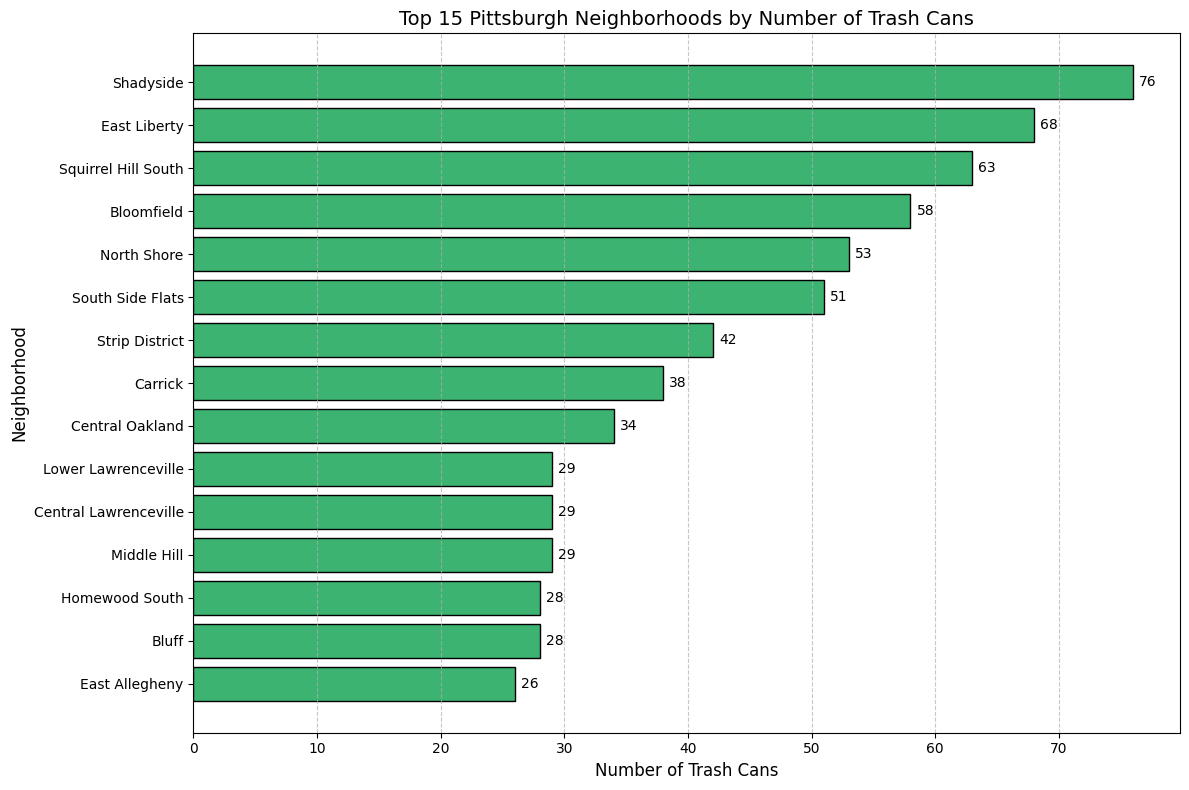

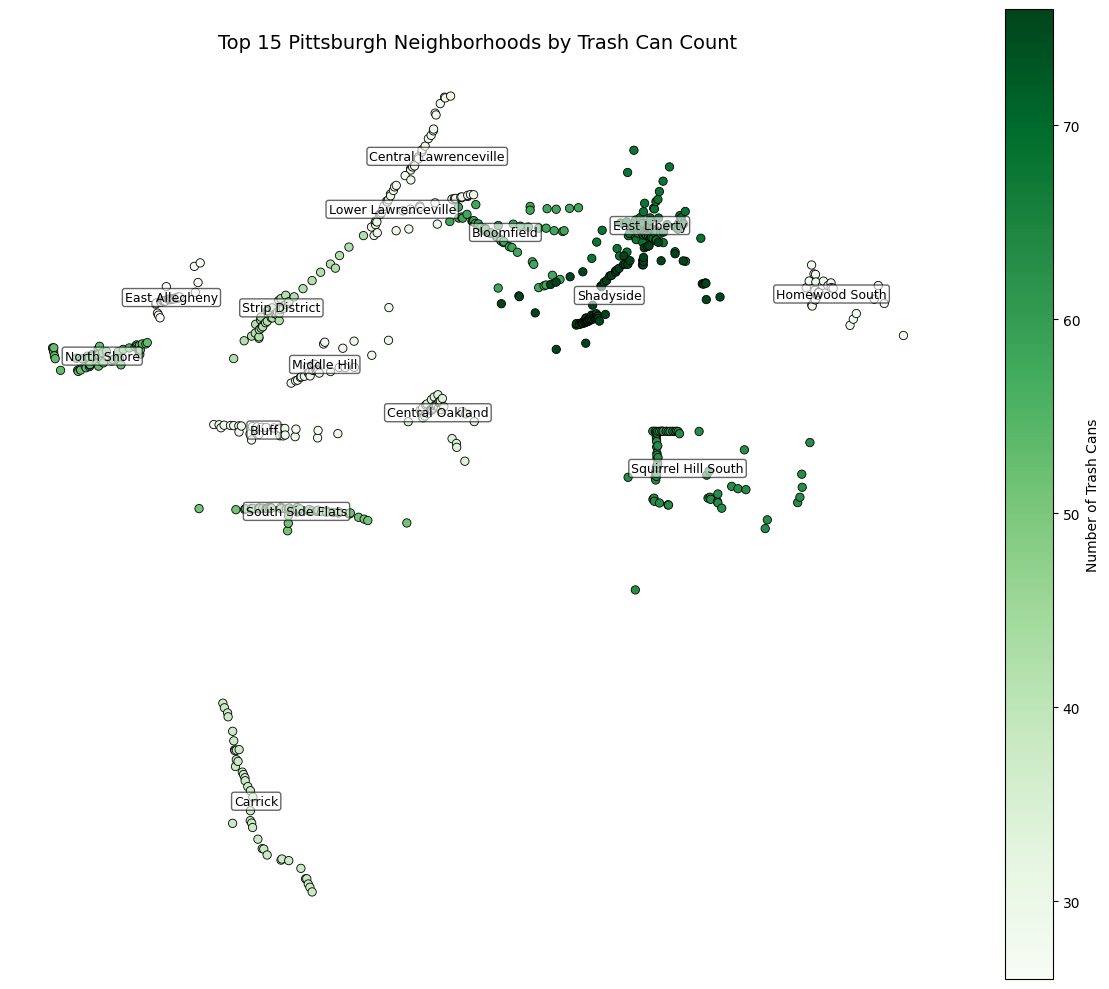

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# read geojson
import geopandas as gpd
# add map support
import contextily as ctx

# read csv
trash_df = pd.read_csv('number_of_transhes.csv')

# count csv
missing = trash_df['neighborhood'].isna().sum()
print(f"Missing 'neighborhood': {missing}")

# categorized by community
trash_by_nhd = trash_df.groupby('neighborhood').size().reset_index(name='TrashCount')
print("\nTrash can counts by Neighborhood:")
print(trash_by_nhd.sort_values(by='TrashCount', ascending=False), "\n")

# most 15 community
most_bins = trash_by_nhd.sort_values(by='TrashCount', ascending=False).head(15)

# draw
plt.figure(figsize=(12, 8))
bars = plt.barh(most_bins['neighborhood'], most_bins['TrashCount'],
                color='mediumseagreen', edgecolor='black')

plt.xlabel('Number of Trash Cans', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.title('Top 15 Pittsburgh Neighborhoods by Number of Trash Cans', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # put most trashes bin at top

# graph border settings
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    plt.text(width + 0.5, y_pos, str(int(width)), va='center', fontsize=10)

plt.tight_layout()
plt.show()

# get geojson file(show on map with community)
gdf = gpd.read_file("trashes.geojson")

# get top15's dot and collect as area
gdf_top15 = gdf[gdf['neighborhood'].isin(most_bins['neighborhood'])] 

# combine them to area(like border)
top15_polygons = gdf_top15.dissolve(by='neighborhood', as_index=False)
top15_polygons = top15_polygons.merge(most_bins, on='neighborhood', how='left')

# calculate where to show the community name
top15_polygons = top15_polygons.to_crs(epsg=3857)  # ✅ 添加投影转换以配合底图
top15_polygons['center'] = top15_polygons.geometry.centroid

# draw
fig, ax = plt.subplots(figsize=(12, 10))

# file in color
top15_polygons.plot(
    column='TrashCount',
    cmap='Greens',
    legend=True,
    legend_kwds={'label': "Number of Trash Cans"},
    edgecolor='black',
    linewidth=0.6,
    ax=ax
)

# add the map
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# mark community name
for idx, row in top15_polygons.iterrows():
    x, y = row['center'].x, row['center'].y
    plt.text(x, y, row['neighborhood'], fontsize=9, ha='center', va='center', color='black',
             bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.6))

# graph border settings
plt.title("Top 15 Pittsburgh Neighborhoods by Trash Can Count", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

The result is obvious: Shadyside and East liberty obviously has the most amount of smart garbages. The result is not shocking for me. Since as you can see from the second graph, they are almost connecting each other. But, if you like quiet. Squirrel Hill South is also a great place for you to consider. As you can see, most of the garbage are on one street. while others places in that location doesn't have too much garbage.

Conclusion: